#### Name :- Sharranyan Wijendran
#### ID :- 24180169 

In [1]:
# Load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def load_ev_data(file_path="electric_vehicles_spec_2025.csv.csv"):
    """
    Load the EV dataset CSV file and return a pandas DataFrame.
    """
    return pd.read_csv(file_path)


# Load the dataset
ev_data = load_ev_data()

# Display the first few rows
ev_data.head()


,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


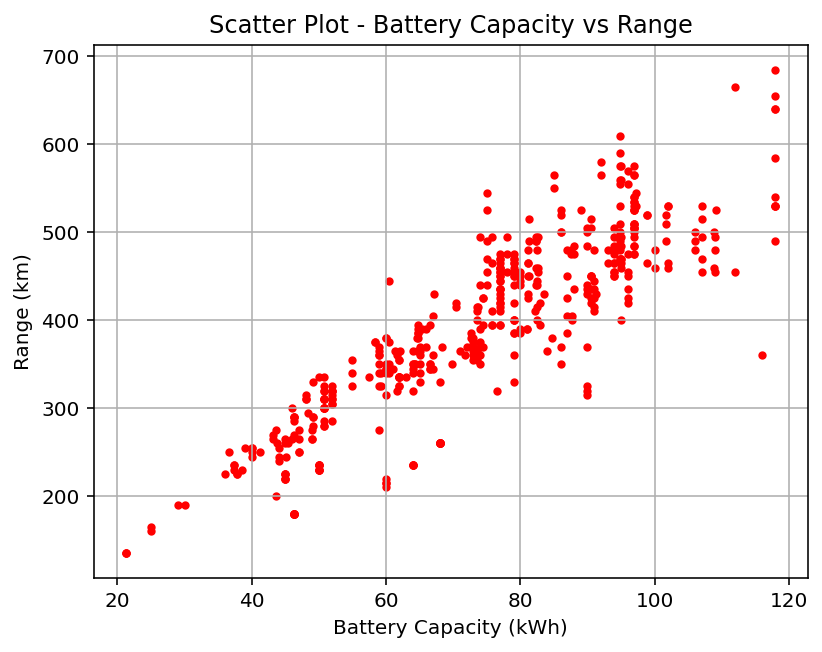

In [2]:
# Scatter plot

def plot_ev_scatter():
    """
    Create a scatter plot of EV range vs battery capacity.
    """
    plt.figure(dpi=144)
    plt.scatter(
        ev_data["battery_capacity_kWh"],
        ev_data["range_km"],
        color="red",
        s=10
    )
    plt.xlabel("Battery Capacity (kWh)")
    plt.ylabel("Range (km)")
    plt.title("Scatter Plot - Battery Capacity vs Range")
    plt.grid(True)
    plt.show()


# Call the function to display the plot
plot_ev_scatter()


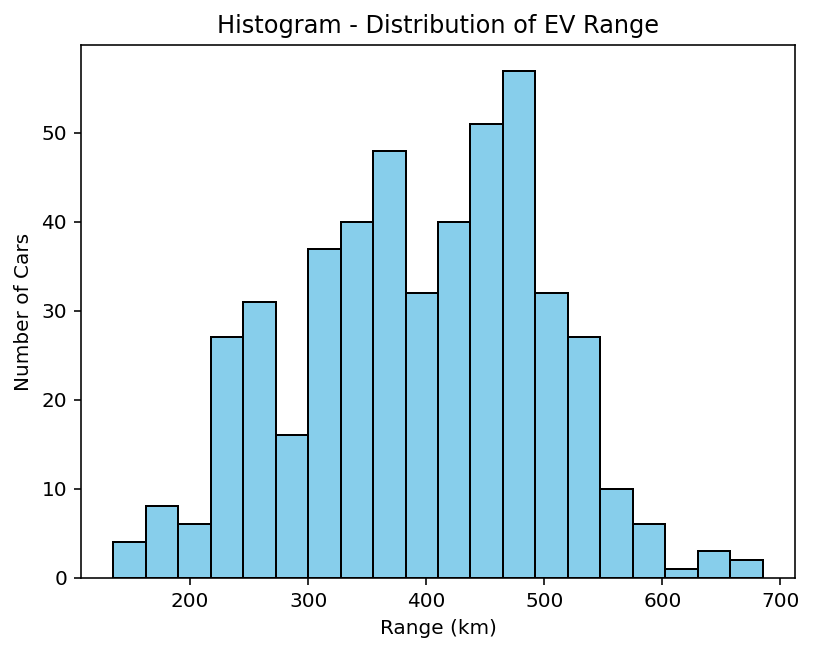

In [3]:
# Histogram

def plot_ev_hist():
    """
    Create a histogram of EV range.
    """
    plt.figure(dpi=144)
    plt.hist(
        ev_data["range_km"],
        bins=20,
        color="skyblue",
        edgecolor="black"
    )
    plt.xlabel("Range (km)")
    plt.ylabel("Number of Cars")
    plt.title("Histogram - Distribution of EV Range")
    plt.show()


# Call the function to display the histogram
plot_ev_hist()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6932\2121022962.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(samples, labels=segments)


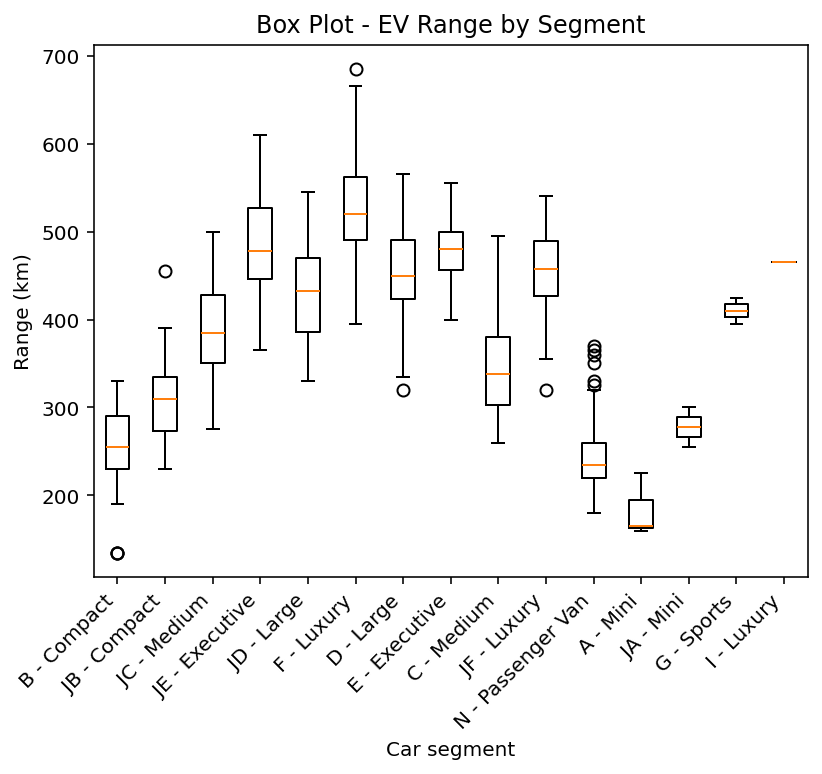

In [4]:
# Box plot

def plot_ev_box():
    """
    Create a box plot of EV range by segment.
    """
    # Prepare samples by segment
    segments = ev_data["segment"].unique()
    samples = [
        ev_data[ev_data["segment"] == seg]["range_km"] 
        for seg in segments
    ]

    # Plot
    plt.figure(dpi=144)
    plt.boxplot(samples, labels=segments)
    plt.xlabel("Car segment")
    plt.ylabel("Range (km)")
    plt.title("Box Plot - EV Range by Segment")
    plt.xticks(rotation=45, ha="right") 
    plt.show()


# Call the function to display the box plot
plot_ev_box()


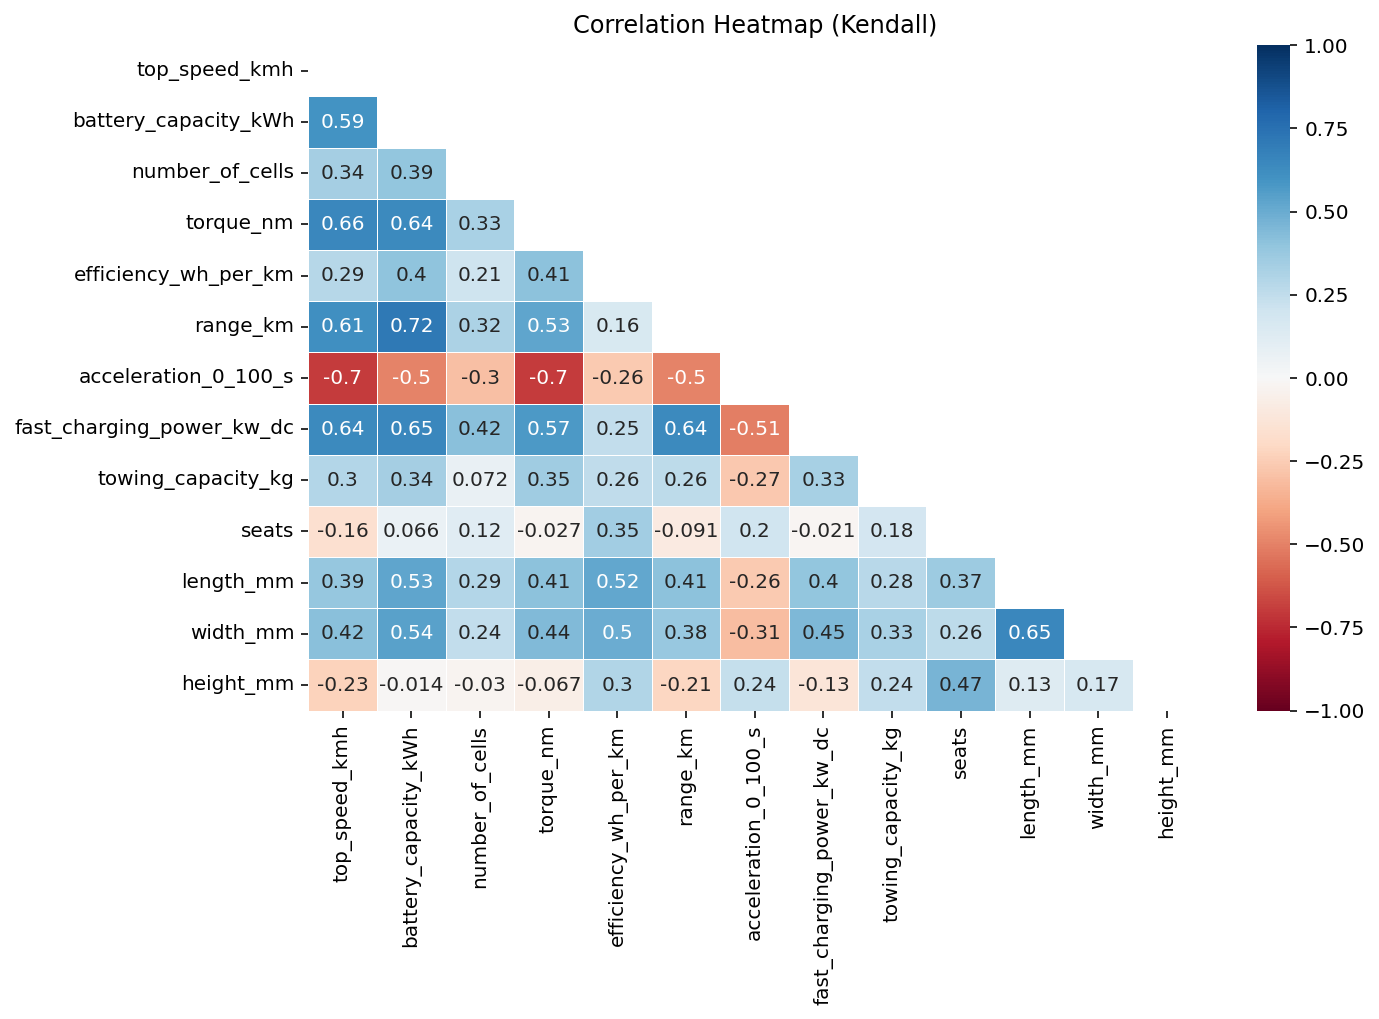

In [5]:
def plot_correlation_heatmap(method="kendall"):
    """
    Plot correlation heatmap using numeric columns only.
    """
    # Select numeric columns and calculate correlation matrix
    numeric_data = ev_data.select_dtypes(include=np.number)
    corr_matrix = numeric_data.corr(method=method)
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Plot heatmap
    plt.figure(dpi=144, figsize=(10, 6))
    sns.heatmap(
        corr_matrix,
        mask=mask,
        annot=True,
        cmap="RdBu",
        vmin=-1,
        vmax=1,
        linewidths=0.5
    )
    plt.title(f"Correlation Heatmap ({method.capitalize()})")
    plt.show()


# Call the function to display the correlation heatmap
plot_correlation_heatmap(method="kendall")


In [6]:
def summary_stats():
    """
    Display the mean, standard deviation, skewness, and kurtosis.
    """
    # Select numeric columns
    numeric_data = ev_data.select_dtypes(include=np.number)

    # Calculate moments
    moments_df = pd.DataFrame({
        "Mean": numeric_data.mean(),
        "Std_Dev": numeric_data.std(),
        "Skewness": numeric_data.skew(),
        "Kurtosis": numeric_data.kurt()
    })

    # Display results
    print(moments_df)


# Call the function to display summary statistics
summary_stats()


                                  Mean      Std_Dev  Skewness   Kurtosis
top_speed_kmh               185.487448    34.252773  0.645003   0.529676
battery_capacity_kWh         74.043724    20.331058 -0.106333  -0.618342
number_of_cells             485.293478  1210.819733  4.967388  24.601381
torque_nm                   498.012739   241.461128  0.834466   0.304018
efficiency_wh_per_km        162.903766    34.317532  2.409480  10.621747
range_km                    393.179916   103.287335 -0.155623  -0.486618
acceleration_0_100_s          6.882636     2.730696  0.880119   0.745237
fast_charging_power_kw_dc   125.008386    58.205012  1.042050   0.600633
towing_capacity_kg         1052.261062   737.851774 -0.095611  -1.105855
seats                         5.263598     1.003961  1.999372   5.494194
length_mm                  4678.506276   369.210573 -0.476060   0.563130
width_mm                   1887.359833    73.656807 -0.754640   1.193304
height_mm                  1601.125523   130.754851